In [60]:
# Dependencies
import os
import requests
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress

from pprint import pprint
import gmaps

In [6]:
# from config import gmaps_key

In [73]:
# Combine raw data into a data frame
yrs_15to18_path = os.path.join("data","crash_data_2015-2018.csv")
yrs_19to21_path = os.path.join("data","crash_data_2019-2021.csv")
years_15to18 = pd.read_csv(yrs_15to18_path)
years_19to21 = pd.read_csv(yrs_19to21_path)
crash_df = pd.concat([years_19to21,years_15to18],ignore_index=True)
crash_df.head()

,CRASH_DATE,CRASH_TIME,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,TRAFFICWAY_TYPE,ALIGNMENT,...,PRIM_CONTRIBUTORY_CAUSE,SEC_CONTRIBUTORY_CAUSE,STREET_DIRECTION,NUM_UNITS,MOST_SEVERE_INJURY,INJURIES_TOTAL,INJURIES_FATAL,CRASH_HOUR,LATITUDE,LONGITUDE
0,1/7/2021,3:00,30,NO CONTROLS,NO CONTROLS,CLEAR,"DARKNESS, LIGHTED ROAD",PARKED MOTOR VEHICLE,DIVIDED - W/MEDIAN (NOT RAISED),STRAIGHT AND LEVEL,...,UNABLE TO DETERMINE,UNABLE TO DETERMINE,W,3,NO INDICATION OF INJURY,0.0,0.0,3,41.924260,-87.753029
1,1/7/2021,0:30,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,"DARKNESS, LIGHTED ROAD",ANGLE,FOUR WAY,STRAIGHT AND LEVEL,...,DISREGARDING TRAFFIC SIGNALS,UNABLE TO DETERMINE,N,2,NONINCAPACITATING INJURY,1.0,0.0,0,41.902701,-87.711526
2,1/7/2021,0:26,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,"DARKNESS, LIGHTED ROAD",TURNING,FOUR WAY,STRAIGHT AND LEVEL,...,FAILING TO YIELD RIGHT-OF-WAY,NOT APPLICABLE,N,3,NO INDICATION OF INJURY,0.0,0.0,0,41.935010,-87.756408
3,1/7/2021,0:07,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,"DARKNESS, LIGHTED ROAD",FIXED OBJECT,DIVIDED - W/MEDIAN BARRIER,STRAIGHT AND LEVEL,...,DISREGARDING TRAFFIC SIGNALS,NOT APPLICABLE,S,1,NONINCAPACITATING INJURY,2.0,0.0,0,41.838327,-87.617613
4,1/6/2021,23:21,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,"DARKNESS, LIGHTED ROAD",ANGLE,FOUR WAY,STRAIGHT AND LEVEL,...,DISREGARDING TRAFFIC SIGNALS,NOT APPLICABLE,W,2,NO INDICATION OF INJURY,0.0,0.0,23,41.881926,-87.745462


In [8]:
crash_columns = crash_df.columns
print(crash_columns)

Index(['CRASH_DATE', 'CRASH_TIME', 'POSTED_SPEED_LIMIT',
       'TRAFFIC_CONTROL_DEVICE', 'DEVICE_CONDITION', 'WEATHER_CONDITION',
       'LIGHTING_CONDITION', 'FIRST_CRASH_TYPE', 'TRAFFICWAY_TYPE',
       'ALIGNMENT', 'ROADWAY_SURFACE_COND', 'ROAD_DEFECT', 'CRASH_TYPE',
       'NOT_RIGHT_OF_WAY_I', 'HIT_AND_RUN_I', 'DAMAGE', 'DATE_POLICE_NOTIFIED',
       'PRIM_CONTRIBUTORY_CAUSE', 'SEC_CONTRIBUTORY_CAUSE', 'STREET_DIRECTION',
       'NUM_UNITS', 'MOST_SEVERE_INJURY', 'INJURIES_TOTAL', 'INJURIES_FATAL',
       'CRASH_HOUR', 'LATITUDE', 'LONGITUDE'],
      dtype='object')


In [15]:
# Setup Google Maps API
# gmaps.configure(api_key=gmaps_key)

#### What impacts crash type the most? - Romi

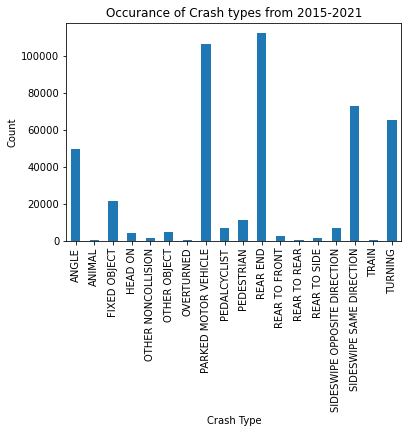

<Figure size 432x288 with 0 Axes>

In [14]:
# Create first crash type bar graph
grouped_crahses = crash_df.groupby(["FIRST_CRASH_TYPE"])
crash_count = grouped_crahses["FIRST_CRASH_TYPE"].count()
crash_chart = crash_count.plot(kind='bar')
crash_chart.set_xlabel("Crash Type")
crash_chart.set_ylabel("Count")
crash_chart.set_title("Occurance of Crash types from 2015-2021")
plt.show()
plt.tight_layout()

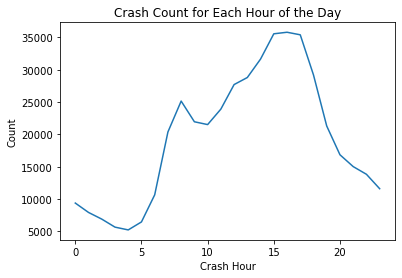

<Figure size 432x288 with 0 Axes>

In [15]:
# Create crash count per hour (histogram/line)
crahses_per_hour_grouped = crash_df.groupby(["CRASH_HOUR"])
hour_count = crahses_per_hour_grouped["CRASH_HOUR"].count()
hour_chart = hour_count.plot(kind='line')
hour_chart.set_xlabel("Crash Hour")
hour_chart.set_ylabel("Count")
hour_chart.set_title("Crash Count for Each Hour of the Day")
plt.show()
plt.tight_layout()

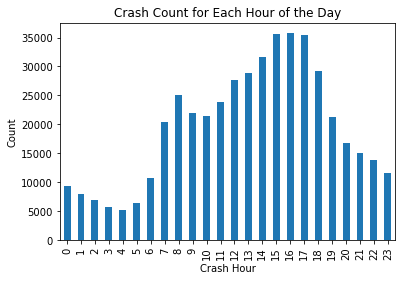

<Figure size 432x288 with 0 Axes>

In [36]:
crahses_per_hour_grouped = crash_df.groupby(["CRASH_HOUR"])
hour_count = crahses_per_hour_grouped["CRASH_HOUR"].count()
hour_chart = hour_count.plot(kind='bar')
hour_chart.set_xlabel("Crash Hour")
hour_chart.set_ylabel("Count")
hour_chart.set_title("Crash Count for Each Hour of the Day")
plt.show()
plt.tight_layout()

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

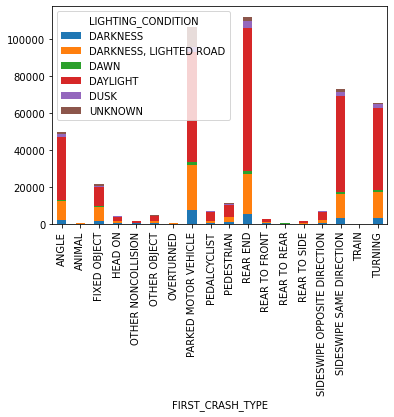

In [70]:
lighting_crash_plot = crash_df.groupby(['FIRST_CRASH_TYPE', 'LIGHTING_CONDITION']).size().unstack().plot(kind='bar', stacked=True)
plt.plot

In [74]:
crash_df.head()

,CRASH_DATE,CRASH_TIME,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,TRAFFICWAY_TYPE,ALIGNMENT,...,PRIM_CONTRIBUTORY_CAUSE,SEC_CONTRIBUTORY_CAUSE,STREET_DIRECTION,NUM_UNITS,MOST_SEVERE_INJURY,INJURIES_TOTAL,INJURIES_FATAL,CRASH_HOUR,LATITUDE,LONGITUDE
0,1/7/2021,3:00,30,NO CONTROLS,NO CONTROLS,CLEAR,"DARKNESS, LIGHTED ROAD",PARKED MOTOR VEHICLE,DIVIDED - W/MEDIAN (NOT RAISED),STRAIGHT AND LEVEL,...,UNABLE TO DETERMINE,UNABLE TO DETERMINE,W,3,NO INDICATION OF INJURY,0.0,0.0,3,41.924260,-87.753029
1,1/7/2021,0:30,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,"DARKNESS, LIGHTED ROAD",ANGLE,FOUR WAY,STRAIGHT AND LEVEL,...,DISREGARDING TRAFFIC SIGNALS,UNABLE TO DETERMINE,N,2,NONINCAPACITATING INJURY,1.0,0.0,0,41.902701,-87.711526
2,1/7/2021,0:26,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,"DARKNESS, LIGHTED ROAD",TURNING,FOUR WAY,STRAIGHT AND LEVEL,...,FAILING TO YIELD RIGHT-OF-WAY,NOT APPLICABLE,N,3,NO INDICATION OF INJURY,0.0,0.0,0,41.935010,-87.756408
3,1/7/2021,0:07,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,"DARKNESS, LIGHTED ROAD",FIXED OBJECT,DIVIDED - W/MEDIAN BARRIER,STRAIGHT AND LEVEL,...,DISREGARDING TRAFFIC SIGNALS,NOT APPLICABLE,S,1,NONINCAPACITATING INJURY,2.0,0.0,0,41.838327,-87.617613
4,1/6/2021,23:21,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,"DARKNESS, LIGHTED ROAD",ANGLE,FOUR WAY,STRAIGHT AND LEVEL,...,DISREGARDING TRAFFIC SIGNALS,NOT APPLICABLE,W,2,NO INDICATION OF INJURY,0.0,0.0,23,41.881926,-87.745462


In [75]:
new_crash_df = crash_df
new_crash_df['Month'] = pd.DatetimeIndex(new_crash_df['CRASH_DATE']).month
new_crash_df.head()

,CRASH_DATE,CRASH_TIME,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,TRAFFICWAY_TYPE,ALIGNMENT,...,SEC_CONTRIBUTORY_CAUSE,STREET_DIRECTION,NUM_UNITS,MOST_SEVERE_INJURY,INJURIES_TOTAL,INJURIES_FATAL,CRASH_HOUR,LATITUDE,LONGITUDE,Month
0,1/7/2021,3:00,30,NO CONTROLS,NO CONTROLS,CLEAR,"DARKNESS, LIGHTED ROAD",PARKED MOTOR VEHICLE,DIVIDED - W/MEDIAN (NOT RAISED),STRAIGHT AND LEVEL,...,UNABLE TO DETERMINE,W,3,NO INDICATION OF INJURY,0.0,0.0,3,41.924260,-87.753029,1
1,1/7/2021,0:30,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,"DARKNESS, LIGHTED ROAD",ANGLE,FOUR WAY,STRAIGHT AND LEVEL,...,UNABLE TO DETERMINE,N,2,NONINCAPACITATING INJURY,1.0,0.0,0,41.902701,-87.711526,1
2,1/7/2021,0:26,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,"DARKNESS, LIGHTED ROAD",TURNING,FOUR WAY,STRAIGHT AND LEVEL,...,NOT APPLICABLE,N,3,NO INDICATION OF INJURY,0.0,0.0,0,41.935010,-87.756408,1
3,1/7/2021,0:07,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,"DARKNESS, LIGHTED ROAD",FIXED OBJECT,DIVIDED - W/MEDIAN BARRIER,STRAIGHT AND LEVEL,...,NOT APPLICABLE,S,1,NONINCAPACITATING INJURY,2.0,0.0,0,41.838327,-87.617613,1
4,1/6/2021,23:21,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,"DARKNESS, LIGHTED ROAD",ANGLE,FOUR WAY,STRAIGHT AND LEVEL,...,NOT APPLICABLE,W,2,NO INDICATION OF INJURY,0.0,0.0,23,41.881926,-87.745462,1


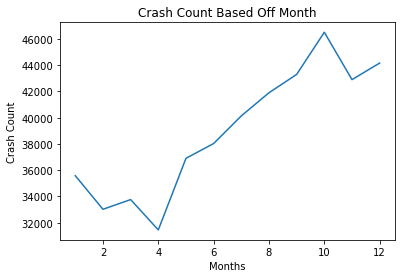

<Figure size 432x288 with 0 Axes>

In [77]:
# Create hit and run vs month (line) -analysis correlation to holidays
month_grouped = new_crash_df.groupby(["Month"])
month_count = month_grouped["Month"].count()
month_chart = month_count.plot(kind='line')
month_chart.set_xlabel("Months")
month_chart.set_ylabel("Crash Count")
month_chart.set_title("Crash Count Based Off Month")
plt.show()
plt.tight_layout()

#### What type of injuries are caused by what types of crashes? - Jonathan

In [ ]:
# Create cost of damage and injury count (scatter with regression)

In [ ]:
# Create cost of damage and fatal injury count (scatter with regression)

In [ ]:
# Create speed vs. fatality count (scatter with regression)

#### What types of wrecks occur based off location? - Andrew

In [ ]:
# Create bar graph for trafficway_type

In [ ]:
# Create heat map for total injuries by location

In [ ]:
# Create heat map for fatal injuries by location

In [ ]:
# Baker
# Use google maps api to get location of high schools in Chicago
# Create heat map of crashes by location with location of high schools plotted

#### What weird connections can we make?

In [ ]:
#Baker
# Create direction facing bar graph (NSEW)

In [ ]:
# Andrew
# Pull in dataset for moon phases
# Create crash count vs. moon phases